In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Mall Customer Segmentation 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

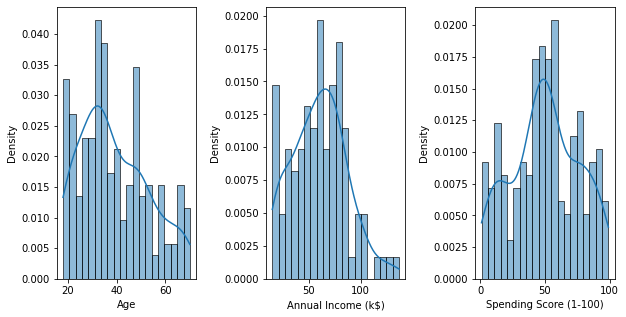

In [8]:
plt.figure(1 , figsize = (10 , 5))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20, kde=True, stat="density")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

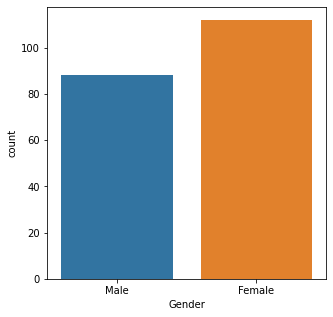

In [9]:
plt.figure(1 , figsize = (5 , 5))
sns.countplot(data=df,x='Gender')

Text(0.5, 1.0, 'Age vs Annual Income Based On Gender')

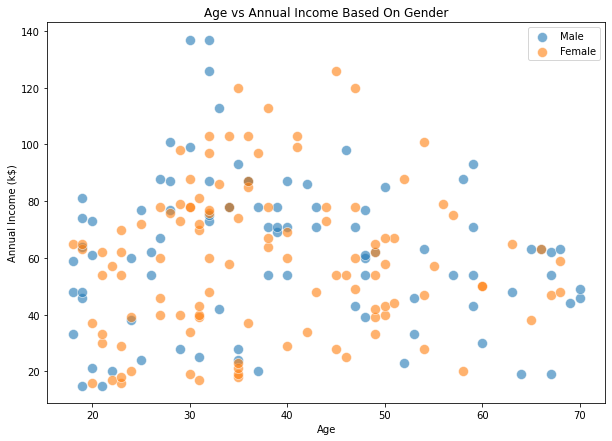

In [10]:
plt.figure(1 , figsize = (10 , 7))
for gender in ['Male','Female']:
    sns.scatterplot(data=df[df.Gender == gender],x='Age',y='Annual Income (k$)',label=gender,s=100,alpha=.6)
plt.title('Age vs Annual Income Based On Gender')

Text(0.5, 1.0, 'Annual Income vs Spending Score Based On Gender')

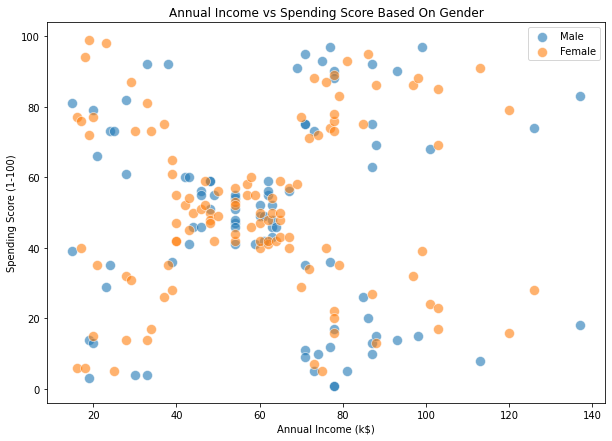

In [11]:
plt.figure(1 , figsize = (10 , 7))
for gender in ['Male','Female']:
    sns.scatterplot(data=df[df.Gender == gender],y='Spending Score (1-100)',x='Annual Income (k$)',label=gender,s=100,alpha=.6)
plt.title('Annual Income vs Spending Score Based On Gender')

## Segmentation using Annual Income and Spending Score

In [12]:
X = df.iloc[:,[3,4]].values

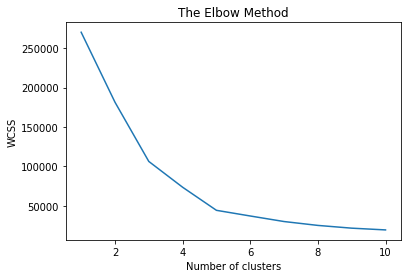

In [13]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=12,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The number of clusters is 5

In [14]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=12)
y_kmeans = kmeans.fit_predict(X)

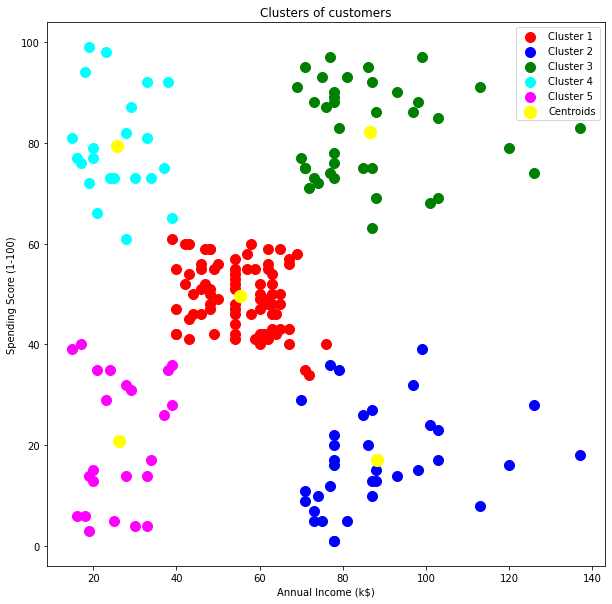

In [15]:
# Visualising the clusters
plt.figure(1 , figsize = (10 , 10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

K-Means will partition your customers into mutually exclusive groups, for example, into `5 clusters`. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the `5 clusters` can be:

`Cluster1` : High Annual Income and Low Spending Score (**Careful**)

`Cluster2` : High Annual Income and High Spending Score (**Target**)

`Cluster3` : Low Annual Income and Low Spending Score (**Sensible**)

`Cluster4` : Low Annual Income and High Spending Score (**Careless**)

`Cluster5` : Middle Annual Income and Middle Spending Score (**Standard**)


## Segmentation using Annual Income , Spending Score and Age

In [16]:
X2 = df.iloc[:,2:]

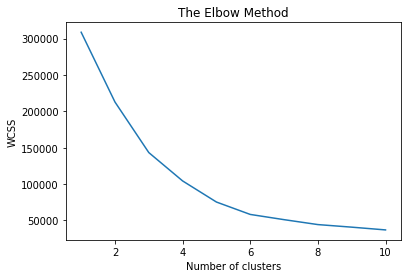

In [17]:
# Using the Elbow method to find the optimal number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i,init='k-means++',n_init=12)
    kmeans2.fit(X2)
    wcss.append(kmeans2.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The number of clusters is 6

In [18]:
# Training the K-Means model on the dataset
kmeans2 = KMeans(n_clusters=6,init='k-means++',n_init=12)
y_kmeans2 = kmeans2.fit_predict(X2)

In [19]:
df['cluster'] = y_kmeans2

In [20]:
# Visualising the clusters
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(df.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df[df.cluster == C]['Annual Income (k$)'],
                                y = df[df.cluster == C]['Age'],
                                z = df[df.cluster == C]['Spending Score (1-100)'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Annual Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending Score', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

K-Means will partition your customers into mutually exclusive groups, for example, into `6 clusters`. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the `6 clusters` can be:

`Cluster1` : Mid Age , High Annual Income and Low Spending Score 

`Cluster2` : Mid Age , High Annual Income and High Spending Score 

`Cluster3` : Old Age , Low Annual Income and Very Low Spending Score `

`Cluster4` : Old Age , High Annual Income and High Spending Score 

`Cluster5` : Youth Age, Low Annual Income and High Spending Score 

`Cluster6` : Youth Age, Low Annual Income and High Spending Score 